<a href="https://colab.research.google.com/github/FaiqFadhlurrahmanElHakim/MachineLearning/blob/main/Pertemuan12_AI_Faiq_Fadhlurrahman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Import

In [4]:
import pandas as pd
train = pd.read_csv('https://raw.githubusercontent.com/WildanBudiawanZ/pembelajaran-mesin/main/twitter.csv', sep=',')

#Data Understanding

In [5]:
train.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


In [6]:
len(train)

27481

In [7]:
train['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [8]:
#How's distributed the dataset? Is it biased?
train.groupby('sentiment').nunique()

,textID,text,selected_text
sentiment,,,
negative,7781,7781,5861
neutral,11118,11117,11111
positive,8582,8582,5537


#Data Cleaning

In [9]:
train = train[['selected_text','sentiment']]
train.head()

,selected_text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD,negative
2,bullying me,negative
3,leave me alone,negative
4,"Sons of ****,",negative


In [10]:
train["selected_text"].isnull().sum()

1

In [11]:
train["selected_text"].fillna("No content", inplace = True)

In [12]:
import re

def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data

In [13]:
temp = []
#Splitting pd.Series to list
data_to_list = train['selected_text'].values.tolist()
for i in range(len(data_to_list)):
  temp.append(depure_data(data_to_list[i]))
list(temp[:50])

['I`d have responded, if I were going',
 'Sooo SAD',
 'bullying me',
 'leave me alone',
 'Sons of ****,',
 ' - some shameless plugging for the best Rangers forum on earth',
 'fun',
 'Soooo high',
 'Both of you',
 'Wow... u just became cooler.',
 'as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff',
 'like',
 'DANGERously',
 'lost',
 'test test from the LG enV2',
 'Uh oh, I am sunburned',
 '*sigh*',
 'sick',
 'onna',
 'Hes just not that into you',
 'oh Marly, I`m so sorry!! I hope you find her soon!! <3 <3',
 'interesting.',
 'is cleaning the house for her family who is comming later today..',
 'gotta restart my computer .. I thought Win7 was supposed to put an end to the constant rebootiness',
 'SEe waT I Mean bOuT FoLL0w fRiiDaYs... It`S cALLed LoSe f0LloWeRs FridAy... smH',
 'the free fillin` app on my ipod is fun, im addicted',
 'I`m sorry.',
 '.no internet',
 'fun',
 'Power back up not working too',
 'Quite....heavenly',
 'hop

In [14]:
from gensim.utils import simple_preprocess
import gensim

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        

data_words = list(sent_to_words(temp))
print(data_words[:10])

[['have', 'responded', 'if', 'were', 'going'], ['sooo', 'sad'], ['bullying', 'me'], ['leave', 'me', 'alone'], ['sons', 'of'], ['some', 'shameless', 'plugging', 'for', 'the', 'best', 'rangers', 'forum', 'on', 'earth'], ['fun'], ['soooo', 'high'], ['both', 'of', 'you'], ['wow', 'just', 'became', 'cooler']]


In [15]:
len(data_words)

27481

In [16]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [17]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['have responded if were going', 'sooo sad', 'bullying me', 'leave me alone', 'sons of']


In [18]:
import numpy as np

data = np.array(data)

In [19]:
import tensorflow as tf

labels = np.array(train['sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'neutral':
        y.append(0)
    if labels[i] == 'negative':
        y.append(1)
    if labels[i] == 'positive':
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [20]:
len(labels)


27481

In [21]:
import keras
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200

In [22]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   68  146   41]
 [   0    0    0 ...    0  397   65]
 [   0    0    0 ...    0    0   11]
 ...
 [   0    0    0 ...  372   10    3]
 [   0    0    0 ...   24  542    4]
 [   0    0    0 ... 2424  199  657]]


In [23]:
print(labels)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

20610 6871 20610 6871


#Model Building

**Simple RNN model**

In [25]:
model0 = Sequential()
model0.add(layers.Embedding(max_words, 15))
model0.add(layers.SimpleRNN(15))
model0.add(layers.Dense(3,activation='softmax'))

model0.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint0 = ModelCheckpoint("best_model0.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model0.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test),callbacks=[checkpoint0])

Epoch 1/5
645/645 [==============================] - ETA: 0s - loss: 0.7546 - accuracy: 0.6780
Epoch 1: val_accuracy improved from -inf to 0.75360, saving model to best_model0.hdf5
645/645 [==============================] - 33s 50ms/step - loss: 0.7546 - accuracy: 0.6780 - val_loss: 0.6060 - val_accuracy: 0.7536
Epoch 2/5
644/645 [============================>.] - ETA: 0s - loss: 0.5248 - accuracy: 0.7981
Epoch 2: val_accuracy improved from 0.75360 to 0.80454, saving model to best_model0.hdf5
645/645 [==============================] - 30s 46ms/step - loss: 0.5248 - accuracy: 0.7981 - val_loss: 0.5086 - val_accuracy: 0.8045
Epoch 3/5
644/645 [============================>.] - ETA: 0s - loss: 0.4995 - accuracy: 0.8098
Epoch 3: val_accuracy did not improve from 0.80454
645/645 [==============================] - 30s 46ms/step - loss: 0.4996 - accuracy: 0.8098 - val_loss: 0.5045 - val_accuracy: 0.7973
Epoch 4/5
644/645 [============================>.] - ETA: 0s - loss: 0.4475 - accuracy: 0.

**Single LTSM Layer Model**

In [26]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(3,activation='softmax'))

model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/5
645/645 [==============================] - ETA: 0s - loss: 0.7977 - accuracy: 0.6521
Epoch 1: val_accuracy improved from -inf to 0.73614, saving model to best_model1.hdf5
645/645 [==============================] - 59s 88ms/step - loss: 0.7977 - accuracy: 0.6521 - val_loss: 0.6407 - val_accuracy: 0.7361
Epoch 2/5
645/645 [==============================] - ETA: 0s - loss: 0.5764 - accuracy: 0.7730
Epoch 2: val_accuracy improved from 0.73614 to 0.77689, saving model to best_model1.hdf5
645/645 [==============================] - 53s 82ms/step - loss: 0.5764 - accuracy: 0.7730 - val_loss: 0.5384 - val_accuracy: 0.7769
Epoch 3/5
645/645 [==============================] - ETA: 0s - loss: 0.5068 - accuracy: 0.8002
Epoch 3: val_accuracy improved from 0.77689 to 0.81036, saving model to best_model1.hdf5
645/645 [==============================] - 53s 81ms/step - loss: 0.5068 - accuracy: 0.8002 - val_loss: 0.5012 - val_accuracy: 0.8104
Epoch 4/5
645/645 [==============================] -

**Bidirectional Model**

In [28]:
model2 = Sequential()

model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(3,activation='softmax'))
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/5
645/645 [==============================] - ETA: 0s - loss: 0.7862 - accuracy: 0.6594
Epoch 1: val_accuracy improved from -inf to 0.73730, saving model to best_model2.hdf5
645/645 [==============================] - 97s 145ms/step - loss: 0.7862 - accuracy: 0.6594 - val_loss: 0.6286 - val_accuracy: 0.7373
Epoch 2/5
645/645 [==============================] - ETA: 0s - loss: 0.5632 - accuracy: 0.7769
Epoch 2: val_accuracy improved from 0.73730 to 0.80017, saving model to best_model2.hdf5
645/645 [==============================] - 89s 138ms/step - loss: 0.5632 - accuracy: 0.7769 - val_loss: 0.5179 - val_accuracy: 0.8002
Epoch 3/5
645/645 [==============================] - ETA: 0s - loss: 0.4997 - accuracy: 0.8060
Epoch 3: val_accuracy improved from 0.80017 to 0.80338, saving model to best_model2.hdf5
645/645 [==============================] - 90s 140ms/step - loss: 0.4997 - accuracy: 0.8060 - val_loss: 0.4946 - val_accuracy: 0.8034
Epoch 4/5
645/645 [==============================

**1D Convolutional Model**

In [29]:
from keras import regularizers
model3 = Sequential()
model3.add(layers.Embedding(max_words, 40, input_length=max_len))
model3.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model3.add(layers.MaxPooling1D(5))
model3.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model3.add(layers.GlobalMaxPooling1D())
model3.add(layers.Dense(3,activation='softmax'))
model3.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

checkpoint3 = ModelCheckpoint("best_model3.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model3.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test),callbacks=[checkpoint3])

Epoch 1/5
645/645 [==============================] - 15s 22ms/step - loss: 1.0422 - acc: 0.5457 - val_loss: 0.9329 - val_acc: 0.6062
Epoch 2/5
645/645 [==============================] - 16s 25ms/step - loss: 0.8558 - acc: 0.6295 - val_loss: 0.8675 - val_acc: 0.6159
Epoch 3/5
645/645 [==============================] - 17s 27ms/step - loss: 0.7900 - acc: 0.7105 - val_loss: 0.7909 - val_acc: 0.7296
Epoch 4/5
645/645 [==============================] - 14s 21ms/step - loss: 0.6856 - acc: 0.7672 - val_loss: 0.7103 - val_acc: 0.7431
Epoch 5/5
645/645 [==============================] - 13s 21ms/step - loss: 0.6356 - acc: 0.7820 - val_loss: 0.6570 - val_acc: 0.7682


#Best Model Validation

In [30]:
best_model = keras.models.load_model("best_model2.hdf5")

In [31]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

215/215 - 7s - loss: 0.4805 - accuracy: 0.8139 - 7s/epoch - 33ms/step
Model accuracy:  0.8138553500175476


In [32]:
predictions = best_model.predict(X_test)
predictions

array([[0.01035178, 0.02355966, 0.9660886 ],
       [0.02497271, 0.9678325 , 0.00719478],
       [0.2558537 , 0.00795665, 0.7361896 ],
       ...,
       [0.01747224, 0.9546598 , 0.02786795],
       [0.93212235, 0.04229661, 0.02558105],
       [0.6423743 , 0.3346477 , 0.02297809]], dtype=float32)

**Confusion Matrix**

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


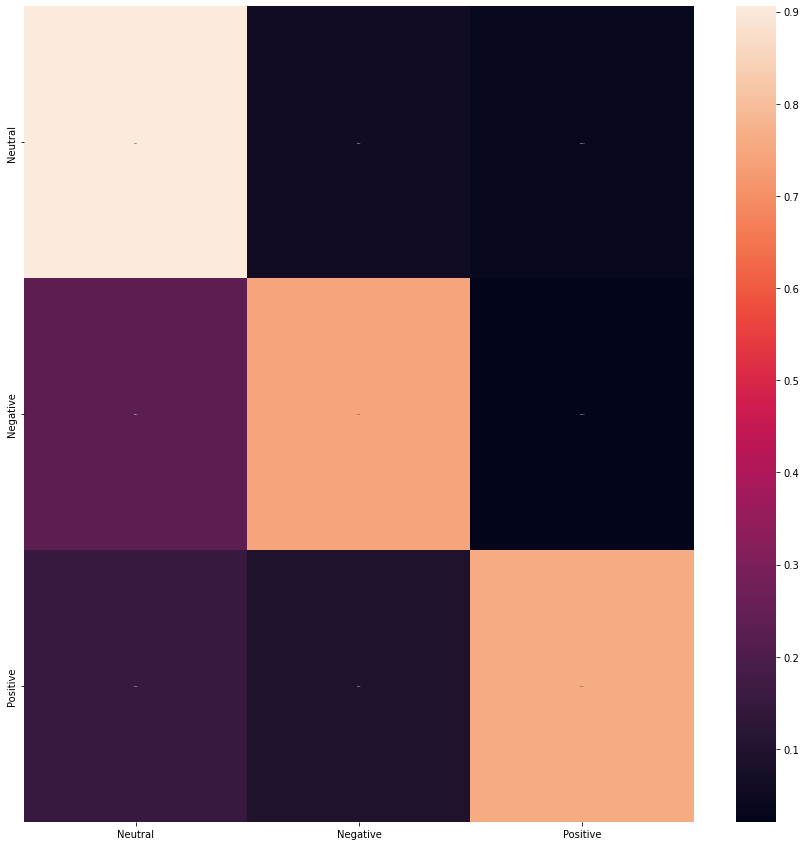

In [34]:
import seaborn as sns
conf_matrix = pd.DataFrame(matrix, index = ['Neutral','Negative','Positive'],columns = ['Neutral','Negative','Positive'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 2})

In [35]:
sentiment = ['Neutral','Negative','Positive']

In [36]:
sentiment

['Neutral', 'Negative', 'Positive']

In [37]:
sentiment[2]

'Positive'

In [44]:
sequence = tokenizer.texts_to_sequences(['this experience has been the worst , want my money back'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]zx

SyntaxError: ignored

In [40]:
sequence = tokenizer.texts_to_sequences(['this data science article is the best ever'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Positive'

In [45]:
sequence = tokenizer.texts_to_sequences(['i hate youtube ads, they are annoying'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]xz

SyntaxError: ignored

#Reference

https://github.com/WildanBudiawanZ/pembelajaran-mesin/blob/main/Pertemuan_12.ipynb